## CHO

In [1]:
import csv
import numpy as np
import pandas as pd

with open('cho.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
data = pd.read_csv("test.csv",header=None)

print(data)

# i=0
# while(i<len(data)):
#     if(data.iloc[i][1]==-1):
#         data.drop(data.index[i],inplace=True)
#         continue
#     else:
#         i=i+1
        
print(data.shape)

import numpy as np
data_clean = np.zeros((data.shape[0],data.shape[1]-2))
for i in range(len(data)):
    for j in range(2,len(data.iloc[i])):
            data_clean[i][j-2] = data.iloc[i][j]
print(data_clean) 

print(data_clean.shape)

      0   1      2      3      4      5      6      7      8     9      10  \
0      1   1 -0.690 -0.960 -1.160 -0.660 -0.550  0.120 -1.070 -1.22  0.820   
1      2   1 -0.210  0.190  0.860  0.040 -0.350 -0.390 -0.510 -0.20  0.000   
2      3   1 -0.300 -0.560 -0.290 -0.500 -0.270 -0.290 -0.560 -1.04  0.320   
3      4   1  0.070  0.260 -0.470 -0.680 -0.630 -0.390  0.070  0.79  0.580   
4      5   1 -1.040  0.130  0.510 -0.440 -0.880 -0.320  0.210  0.95  1.070   
5      6   1 -1.170  0.090 -0.520 -1.040 -1.160 -0.830  0.170  0.93  0.890   
6      7   1 -0.160  0.350 -0.130 -0.260 -0.400 -0.470  0.100  0.74  0.450   
7      8   1 -0.890  0.770 -0.250 -0.710 -0.330  0.050 -0.150 -0.42  0.680   
8      9   1 -0.180  0.140 -0.040 -0.760 -0.680 -0.530 -0.370  0.19  0.810   
9     10   1 -0.420 -0.570  0.080 -0.440 -0.360 -0.180 -0.150  0.56  0.630   
10    11   1 -0.150  0.320  0.230 -0.760 -1.160 -0.900 -0.230  0.28  0.450   
11    12   1 -1.180 -1.020 -1.740 -1.690 -0.820 -0.190 -0.310  0

[[-0.69  -0.96  -1.16  ... -0.04   0.19   0.82 ]
 [-0.21   0.19   0.86  ... -1.23  -0.325  0.   ]
 [-0.3   -0.56  -0.29  ... -0.12  -0.16   0.67 ]
 ...
 [-3.12  -4.12  -3.54  ...  1.48   2.06   2.36 ]
 [-0.79  -0.56  -0.79  ...  0.49   0.08   0.15 ]
 [-1.16  -1.39  -0.96  ...  0.493  1.27   0.87 ]]
(386, 16)


In [2]:
import math
W = np.zeros((data_clean.shape[0],data_clean.shape[0]))
sigma=8.0
print(W)

for i in range(len(data_clean)):
    for j in range(i+1,len(data_clean)):
        dist=0
        sum=0
        sim=0
        for m in range(len(data_clean[0])):
            sum = sum + ((data_clean[i][m]-data_clean[j][m]))**2
        dist = -((sum**0.5)**2)
        dist = dist/(sigma**2)
        sim = math.e**dist
        W[j][i] = sim
        W[i][j] = sim
        
print(W)        

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.83038225 0.95995488 ... 0.35111201 0.83141731 0.84907775]
 [0.83038225 0.         0.92317086 ... 0.22451322 0.84130553 0.76615112]
 [0.95995488 0.92317086 0.         ... 0.31163614 0.87925314 0.8627618 ]
 ...
 [0.35111201 0.22451322 0.31163614 ... 0.         0.45993347 0.56292147]
 [0.83141731 0.84130553 0.87925314 ... 0.45993347 0.         0.93907832]
 [0.84907775 0.76615112 0.8627618  ... 0.56292147 0.93907832 0.        ]]


In [3]:
D = np.zeros((data_clean.shape[0],data_clean.shape[0]))
print(D)

rowsum = np.sum(W, axis=1)

for i in range(len(W)):
    for j in range(i,i+1):
        D[i][j] = rowsum[j]
        
print(D)        

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[310.20401244   0.           0.         ...   0.           0.
    0.        ]
 [  0.         336.95472717   0.         ...   0.           0.
    0.        ]
 [  0.           0.         338.46823829 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 119.52713523   0.
    0.        ]
 [  0.           0.           0.         ...   0.         327.0089382
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  308.06561315]]


In [17]:
# from scipy.linalg import fractional_matrix_power

# Dpt5 = fractional_matrix_power(D, -0.5)

In [5]:
# print(Dpt5)

In [4]:
L = D - W

In [20]:
# L = Dpt5.dot(L).dot(Dpt5)

In [5]:
print(L)

[[ 3.10204012e+02 -8.30382251e-01 -9.59954876e-01 ... -3.51112006e-01
  -8.31417305e-01 -8.49077752e-01]
 [-8.30382251e-01  3.36954727e+02 -9.23170855e-01 ... -2.24513216e-01
  -8.41305531e-01 -7.66151120e-01]
 [-9.59954876e-01 -9.23170855e-01  3.38468238e+02 ... -3.11636137e-01
  -8.79253139e-01 -8.62761799e-01]
 ...
 [-3.51112006e-01 -2.24513216e-01 -3.11636137e-01 ...  1.19527135e+02
  -4.59933467e-01 -5.62921473e-01]
 [-8.31417305e-01 -8.41305531e-01 -8.79253139e-01 ... -4.59933467e-01
   3.27008938e+02 -9.39078324e-01]
 [-8.49077752e-01 -7.66151120e-01 -8.62761799e-01 ... -5.62921473e-01
  -9.39078324e-01  3.08065613e+02]]


In [6]:
from numpy import linalg

eig_vals, eig_vecs = np.linalg.eig(L)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)




Eigenvectors 
[[ 5.08986599e-02  2.36084494e-03 -2.66254516e-04 ...  2.19554552e-04
  -6.32243947e-05 -2.24514227e-04]
 [ 5.08986599e-02  3.05524983e-03  3.81606097e-03 ...  1.07930299e-04
   8.65714080e-03 -5.01965835e-03]
 [ 5.08986599e-02  2.59982555e-03  1.55498313e-03 ... -6.29146083e-04
   9.28219417e-04 -6.35719389e-05]
 ...
 [ 5.08986599e-02 -9.98604310e-01  3.72359854e-03 ... -2.14793636e-04
   2.12791097e-04 -1.68693302e-06]
 [ 5.08986599e-02  1.79120477e-03 -7.43114971e-04 ... -6.90568402e-03
   5.26248361e-04 -5.50281328e-03]
 [ 5.08986599e-02  1.13085300e-03 -3.51417053e-03 ... -1.32289957e-03
   1.31981236e-03 -8.25951311e-04]]

Eigenvalues 
[1.42108547e-14 1.19804854e+02 2.49524815e+02 2.56676469e+02
 2.59044965e+02 2.70409962e+02 2.73278105e+02 2.73827876e+02
 2.77171892e+02 2.81445546e+02 2.84060973e+02 2.85746304e+02
 2.85965205e+02 2.87580751e+02 2.88694527e+02 2.89299923e+02
 2.89487889e+02 2.89965045e+02 2.90340187e+02 2.90697045e+02
 2.90873300e+02 2.92817386e+02 

In [7]:
eig_vals = list(eig_vals)
print(eig_vals)
for i in range(len(eig_vals)):
    if(eig_vals[i]<0):
        print(eig_vals[i])

[1.4210854715202004e-14, 119.80485393044027, 249.52481452761094, 256.67646882856053, 259.0449646808302, 270.40996220218784, 273.27810487722365, 273.82787567171806, 277.17189238708784, 281.44554570451413, 284.06097270623894, 285.74630447135183, 285.9652053559201, 287.5807514435324, 288.6945271705365, 289.2999229139632, 289.48788929677147, 289.9650452362276, 290.34018718358084, 290.6970451781522, 290.87330036874835, 292.81738643634776, 293.9459123073274, 294.77493061815136, 295.0838819888838, 295.21535000593576, 295.3257503860265, 295.53050801842295, 295.9285257051915, 296.03867718776513, 296.52018389778095, 296.9291054922331, 297.2800323764677, 297.8681597649308, 298.0684772655877, 300.19933604403843, 300.6624805436149, 301.3309517225179, 301.9862916579643, 302.23926889853306, 303.28793370903327, 303.53011479485895, 303.61518957498197, 304.10130130822444, 304.18293056469577, 307.24419688221354, 306.7896556066665, 304.7669241483742, 305.0017794128843, 305.3218898484261, 305.3449904627412

In [8]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# eig_pairs = [(np.abs(eig_vals[i]), i) for i in range(len(eig_vals))]
eig_pairs.sort()

# eig_pairs.reverse()
max = float("-inf")
for i in range(1,len(eig_pairs)):
    if(abs(eig_pairs[i][0]-eig_pairs[i-1][0])>max):
        max = abs(eig_pairs[i][0]-eig_pairs[i-1][0])
        k=i+1
print(max)
print(k)



129.71996059717065
3


In [9]:
print('Eigenvectors in increasing order of corresponding eigen values:')
for i in range(k):
    print((eig_pairs[i][1]))

Eigenvectors in increasing order of corresponding eigen values:
[0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866
 0.05089866 0.05089866 0.05089866 0.05089866 0.05089866 0.0508986

In [10]:
datadict = dict()
for i in range(k):
    datadict[i]=eig_pairs[i][1]

In [11]:
nkdata = pd.DataFrame(datadict) 

In [12]:
print(nkdata)

            0         1         2
0    0.050899  0.002361 -0.000266
1    0.050899  0.003055  0.003816
2    0.050899  0.002600  0.001555
3    0.050899  0.002372  0.000649
4    0.050899  0.002390  0.001214
5    0.050899  0.001891 -0.001545
6    0.050899  0.002489  0.001534
7    0.050899  0.002536  0.001862
8    0.050899  0.002533  0.001110
9    0.050899  0.002218  0.000622
10   0.050899  0.002688  0.001469
11   0.050899  0.001279 -0.006776
12   0.050899  0.002273 -0.001013
13   0.050899  0.002469 -0.001229
14   0.050899  0.002722  0.000443
15   0.050899  0.002222  0.000343
16   0.050899  0.002256  0.000579
17   0.050899  0.002545  0.001067
18   0.050899  0.003081  0.003466
19   0.050899  0.002259  0.000482
20   0.050899  0.002819  0.001988
21   0.050899  0.002210  0.000533
22   0.050899  0.002900  0.002138
23   0.050899  0.002518  0.001116
24   0.050899  0.002906  0.003833
25   0.050899  0.003559  0.007994
26   0.050899  0.002184  0.000132
27   0.050899  0.003501  0.007951
28   0.050899 

In [13]:
import random
k=5
init_center=[]
centroids = dict()
for i in range(k):
    init_center.append(random.randrange(0, nkdata.shape[0]))
    centroids[i+1] = list(nkdata.iloc[init_center[i]])
print(init_center) 
print(centroids)


from operator import add 

def updateCentroid(cluslist,k):
    centroid=dict()
    for i in range(1,k+1):
        centroid[i] = [j for j, x in enumerate(cluslist) if x == i]
        

    for key, value in centroid.items():
        if(len(value)>0):
            res=[0]*nkdata.shape[1]
            for item in value:
                result = list(map(add, res, list(nkdata.iloc[item]))) 
                res=result
            res[:] = [x / len(value) for x in res]    
            centroids[key] = res 
    return centroids   



def kmeans(k,flag,maxIter,centroids):
    while(True):
        cluslist=[]
        for i in range(nkdata.shape[0]):
            min = float("inf")
            for j in range(1,k+1):
                sum=0
                dist=0
                for m in range(len(list(nkdata.iloc[i]))):
                    sum=sum+(list(nkdata.iloc[i])[m]-centroids[j][m])**2
                dist = sum**0.5  
                if(dist<min):
                    min=dist
                    cluster = j
            cluslist.append(cluster) 
        maxIter -= 1
        if(maxIter==0):
            return cluslist, centroids
        if(flag and (cluslist == prevcluslist)):
            return cluslist, centroids
        prevcluslist = cluslist.copy()  
        flag=True
        centroids = updateCentroid(cluslist,k)

cluslist, centroids = kmeans(k,False,100,centroids)
  
print(cluslist)   
print(centroids)
                
        


[331, 337, 226, 124, 131]
{1: [0.05089865985592874, 0.0024047401064656738, 0.0012433115201204226], 2: [0.05089865985592877, 0.0010742906165329622, -0.0027581590993999714], 3: [0.05089865985592877, 0.0021404645895695385, 0.0014047542970895871], 4: [0.05089865985592878, 0.002748175024504172, 0.004771827400054457], 5: [0.05089865985592878, 0.0030792722322316116, 0.0039046475205150137]}
[3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 5, 4, 3, 4, 5, 2, 3, 5, 3, 3, 3, 3, 3, 5, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 5, 5, 5, 5, 1, 3, 5, 4, 5, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 4, 4, 5, 5, 5, 3, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 3, 5, 5, 5, 5, 3, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 3, 5, 5, 4, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 3, 3, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

In [14]:
gtcluslist = list(data.iloc[:,1])
# print(gtcluslist)

P = np.zeros((len(gtcluslist),len(gtcluslist)))
C = np.zeros((len(cluslist),len(cluslist)))

for i in range(len(cluslist)):
    for j in range(i,len(cluslist)):
        if(i==j):
            C[i][j] = 1    
        elif(cluslist[i]==cluslist[j]):
            C[i][j] = 1
            C[j][i] = 1
            
for i in range(len(gtcluslist)):
    for j in range(i,len(gtcluslist)):
        if(i==j):
            P[i][j] = 1    
        elif(gtcluslist[i]==gtcluslist[j]):
            P[i][j] = 1
            P[j][i] = 1
          
        
MTP, MTN, MFP, MFN = 0,0,0,0

for i in range(len(P)):
    for j in range(len(P[0])):
        if(C[i][j]==1 and P[i][j]==1):
            MTP += 1
        elif(C[i][j]==0 and P[i][j]==0):
            MTN += 1
        elif(C[i][j]==1 and P[i][j]==0):
            MFP += 1
        elif(C[i][j]==0 and P[i][j]==1):
            MFN += 1
            
            
rand_index = (MTP+MTN)/(MTP+MTN+MFP+MFN)    

jaccard = (MTP)/(MTP+MFP+MFN)

print("Rand index: ",rand_index)
print("Jaccard index: ",jaccard)


        

Rand index:  0.6570511960052619
Jaccard index:  0.2840208496805291


In [15]:
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean)
# print(data_pca)



x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(cluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if cluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Cho Spectral Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Cho Spectral Scatter plot.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [2]:
x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(gtcluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if gtcluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if gtcluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Cho Ground Truth Spectral Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Cho Ground Truth Spectral Scatter plot.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

## IYER 

In [3]:
import csv
import numpy as np
import pandas as pd

with open('iyer.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
data = pd.read_csv("test.csv",header=None)

print(data)

# i=0
# while(i<len(data)):
#     if(data.iloc[i][1]==-1):
#         data.drop(data.index[i],inplace=True)
#         continue
#     else:
#         i=i+1
        
print(data.shape)

import numpy as np
data_clean = np.zeros((data.shape[0],data.shape[1]-2))
for i in range(len(data)):
    for j in range(2,len(data.iloc[i])):
            data_clean[i][j-2] = data.iloc[i][j]
print(data_clean) 

print(data_clean.shape)

      0   1    2     3     4      5      6      7      8      9     10    11  \
0      1  -1  1.0  0.72  0.10   0.57   1.08   0.66   0.39   0.49  0.28  0.50   
1      2   1  1.0  1.58  1.05   1.15   1.22   0.54   0.73   0.82  0.82  0.90   
2      3   1  1.0  1.10  0.97   1.00   0.90   0.67   0.81   0.88  0.77  0.71   
3      4   1  1.0  0.97  1.00   0.85   0.84   0.72   0.66   0.68  0.47  0.61   
4      5   1  1.0  1.21  1.29   1.08   0.89   0.88   0.66   0.85  0.67  0.58   
5      6   1  1.0  1.45  1.44   1.12   1.10   1.15   0.79   0.77  0.78  0.71   
6      7   1  1.0  1.15  1.10   1.00   1.08   0.79   0.98   1.03  0.59  0.57   
7      8   1  1.0  1.32  1.35   1.13   1.00   0.91   1.22   1.05  0.58  0.57   
8      9   1  1.0  1.01  1.38   1.21   0.79   0.85   0.78   0.73  0.64  0.58   
9     10   1  1.0  0.85  1.03   1.00   0.81   0.82   0.73   0.51  0.24  0.54   
10    11   1  1.0  1.12  0.92   1.01   0.86   0.86   0.70   0.62  0.36  0.37   
11    12   1  1.0  1.23  1.21   0.95   0

In [17]:
import math
W = np.zeros((data_clean.shape[0],data_clean.shape[0]))
sigma=6.8
print(W)

for i in range(len(data_clean)):
    for j in range(i+1,len(data_clean)):
        dist=0
        sum=0
        sim=0
        for m in range(len(data_clean[0])):
            sum = sum + ((data_clean[i][m]-data_clean[j][m]))**2
        dist = -((sum**0.5)**2)
        dist = dist/(sigma**2)
        sim = math.e**dist
        W[j][i] = sim
        W[i][j] = sim
        
print(W)        

D = np.zeros((data_clean.shape[0],data_clean.shape[0]))
print(D)

rowsum = np.sum(W, axis=1)

for i in range(len(W)):
    for j in range(i,i+1):
        D[i][j] = rowsum[j]
        
print(D)        

L = D - W
print(L)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.94233498 0.96300488 ... 0.13199384 0.06891115 0.03729617]
 [0.94233498 0.         0.98845599 ... 0.20999342 0.11635148 0.06700684]
 [0.96300488 0.98845599 0.         ... 0.18628492 0.10316572 0.05882733]
 ...
 [0.13199384 0.20999342 0.18628492 ... 0.         0.90183867 0.77026659]
 [0.06891115 0.11635148 0.10316572 ... 0.90183867 0.         0.92910882]
 [0.03729617 0.06700684 0.05882733 ... 0.77026659 0.92910882 0.        ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[395.94624013   0.           0.         ...   0.           0.
    0.        ]
 [  0.         412.67595009   0.         ...   0.           0.
    0.        ]
 [  0.           0.         412.52108416 ...   0.           0.
    0.        ]
 ...
 [

In [18]:
from numpy import linalg

eig_vals, eig_vecs = np.linalg.eig(L)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 2.03892170e-03  3.41116918e-04  2.60837912e-03 ...  1.77981381e-04
  -8.62372661e-05  7.33183236e-05]
 [ 2.01141500e-03  3.40763684e-04  2.60790905e-03 ... -3.31037224e-03
   1.60308126e-04  1.34805018e-03]
 [ 2.01794010e-03  3.40840185e-04  2.60801296e-03 ... -4.61180943e-03
   9.73413807e-05  1.75498462e-03]
 ...
 [ 1.14443427e-03  3.32867630e-04  2.59695338e-03 ...  1.96889534e-05
  -3.30653307e-06 -7.91448933e-06]
 [-5.12359088e-04  3.36711318e-04  2.60102631e-03 ...  8.55738302e-06
   8.76835353e-07 -4.69948713e-06]
 [-2.74939302e-03  3.41872441e-04  2.60450778e-03 ...  7.31740897e-06
  -1.18346915e-06 -3.39218674e-06]]

Eigenvalues 
[9.76021361e+00 1.63425319e+00 2.82712489e-01 2.35569606e-01
 8.55887468e-02 2.14034019e-02 7.97325535e-15 2.06815080e-06
 2.10587336e+01 2.52948556e+01 2.63763912e+01 2.66568375e+01
 4.13289169e+01 4.48055412e+01 4.51746334e+01 5.45286081e+01
 1.20853883e+02 1.19917751e+02 6.65304420e+01 7.35256334e+01
 7.17122216e+01 7.13564659e+01 

In [19]:
eig_vals = list(eig_vals)
# print(eig_vals)
for i in range(len(eig_vals)):
    if(eig_vals[i]<0):
        print(eig_vals[i])

In [20]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# eig_pairs = [(np.abs(eig_vals[i]), i) for i in range(len(eig_vals))]
eig_pairs.sort()

# eig_pairs.reverse()
max = float("-inf")
for i in range(1,len(eig_pairs)):
    if(abs(eig_pairs[i][0]-eig_pairs[i-1][0])>max):
        max = abs(eig_pairs[i][0]-eig_pairs[i-1][0])
        k=i+1
print(max)
print(k)



18.543846017415262
30


In [21]:
print('Eigenvectors in increasing order of corresponding eigen values:')
for i in range(k):
    print((eig_pairs[i][1]))

datadict = dict()
for i in range(k):
    datadict[i]=eig_pairs[i][1]
nkdata = pd.DataFrame(datadict) 
print(nkdata)

Eigenvectors in increasing order of corresponding eigen values:
[4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.40225453e-02 4.40225453e-02 4.40225453e-02
 4.40225453e-02 4.402

[ 1.64092530e-03  1.42777103e-03  1.46664075e-03  1.52858023e-03
  1.44327394e-03  1.36826134e-03  1.42029078e-03  1.36102597e-03
  1.43666293e-03  1.52455043e-03  1.50667202e-03  1.46965116e-03
  1.52418733e-03  1.60264432e-03  1.62701576e-03  1.56146052e-03
  1.58568373e-03  1.46224652e-03  1.65976123e-03  1.62222620e-03
  1.61369990e-03  1.60456975e-03  1.54826862e-03  1.55258570e-03
  1.57168504e-03  1.43818476e-03  1.51650368e-03  1.48948409e-03
  1.59546222e-03  1.56144096e-03  1.59775070e-03  1.60618936e-03
  1.59015043e-03  1.51878018e-03  1.53533022e-03  1.52239713e-03
  1.55646908e-03  1.57588762e-03  1.53114151e-03  1.51713347e-03
  1.66541168e-03  1.50824231e-03  1.62430300e-03  1.58041222e-03
  1.58562928e-03  1.59409943e-03  1.48854266e-03  1.52916062e-03
  1.66033729e-03  1.51365587e-03  1.56506832e-03  1.50982720e-03
  1.49648059e-03  1.60951885e-03  1.55090880e-03  1.54488614e-03
  1.55864664e-03  1.56851176e-03  1.56564518e-03  1.55028953e-03
  1.61892307e-03  1.57448

In [ ]:
import random
k=10
init_center=[]
centroids = dict()
for i in range(k):
    init_center.append(random.randrange(0, nkdata.shape[0]))
    centroids[i+1] = list(nkdata.iloc[init_center[i]])
print(init_center) 
print(centroids)



cluslist, centroids = kmeans(k,False,999999,centroids)
    
print(cluslist)   
print(centroids)
                
            
        


[509, 280, 179, 436, 292, 194, 77, 232, 105, 345]
{1: [0.04402254532565765, 1.251455306239899e-16, 0.0019398875274968432, 0.0025349813578971455, -0.0014704526522538346, -0.001917030273923178, 0.002606400097043724, 0.0003397151999405295, 0.0018553980626549813, 0.002566280168829727, 0.002846090400798247, 0.0006495103583483229, -0.000351319115240182, 0.001298453833202882, -0.00019582490689641966, 0.0020430933307121276, 0.0020664085900215525, 0.00181881621331909, -0.002583696834776345, 0.0013466316523186325, -0.00047230926424994026, -0.0011632652221869229, 0.0022368714369797814, -0.0008115396605657755, 0.0023891508925075215, 0.0019945858834881525, -0.0006961633814774318, 0.0013956713610875184, -0.0028236795698800632, 0.0015348740034193996], 2: [0.04402254532565759, 1.499544651410437e-17, 0.001939887575311798, 0.002535124465883797, -0.0014708073493354948, -0.001922749440892269, 0.0026081494579401586, 0.0003409434035146812, 0.00201075514244158, 0.0028251159142567038, 0.0031550056344462835, 0

In [26]:
gtcluslist = list(data.iloc[:,1])
# print(gtcluslist)

P = np.zeros((len(gtcluslist),len(gtcluslist)))
C = np.zeros((len(cluslist),len(cluslist)))

for i in range(len(cluslist)):
    for j in range(i,len(cluslist)):
        if(i==j):
            C[i][j] = 1    
        elif(cluslist[i]==cluslist[j]):
            C[i][j] = 1
            C[j][i] = 1
            
for i in range(len(gtcluslist)):
    for j in range(i,len(gtcluslist)):
        if(i==j):
            P[i][j] = 1    
        elif(gtcluslist[i]==gtcluslist[j]):
            P[i][j] = 1
            P[j][i] = 1
          
        
MTP, MTN, MFP, MFN = 0,0,0,0

for i in range(len(P)):
    for j in range(len(P[0])):
        if(C[i][j]==1 and P[i][j]==1):
            MTP += 1
        elif(C[i][j]==0 and P[i][j]==0):
            MTN += 1
        elif(C[i][j]==1 and P[i][j]==0):
            MFP += 1
        elif(C[i][j]==0 and P[i][j]==1):
            MFN += 1
            
            
rand_index = (MTP+MTN)/(MTP+MTN+MFP+MFN)    

jaccard = (MTP)/(MTP+MFP+MFN)

print("Rand index: ",rand_index)
print("Jaccard index: ",jaccard)


        

Rand index:  0.5701057656693691
Jaccard index:  0.2366520736867979


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

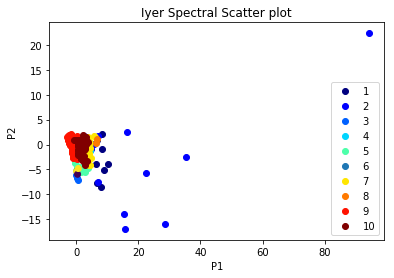

In [27]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean)
# print(data_pca)



x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(cluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if cluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Iyer Spectral Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

plt.show()
# fig = plt.figure()
# plt.savefig('pcaa.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

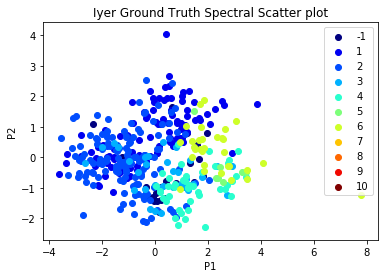

In [4]:
x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(gtcluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if gtcluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if gtcluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Iyer Ground Truth Spectral Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Iyer Ground Truth Spectral Scatter plot.png')